In [68]:
import pandas as pd 
import numpy as np
import xgboost as xgb
import optuna
import seaborn as sns

from utils import load_data, transform_dataset
from dataset import encode_labels, decode_labels, labels_encoding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
train_data = transform_dataset(load_data('train'))
train_data = encode_labels(train_data)
val_data = transform_dataset(load_data('val'))
val_data = encode_labels(val_data)
test_data = transform_dataset(load_data('test'))
test_data = encode_labels(test_data)

In [15]:
type(train_data["text"].values)

numpy.ndarray

In [32]:
tfidf = TfidfVectorizer(smooth_idf=True, norm='l2', sublinear_tf=True)
tfidf.fit(train_data['text'])
train_data_tfidf = tfidf.transform(train_data['text'])
train_data_dmatrix = xgb.DMatrix(data=train_data_tfidf, label=train_data['label'])
val_data_tfidf = tfidf.transform(val_data['text'])
val_data_dmatrix = xgb.DMatrix(data=val_data_tfidf, label=val_data['label'])
test_data_tfidf = tfidf.transform(test_data['text'])
test_data_dmatrix = xgb.DMatrix(data=test_data_tfidf, label=test_data['label'])

In [50]:
def objective(trial):

    params = {
        'objective': 'multi:softmax',
        'num_class': 6,
        'eval_metric': 'mlogloss',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),
        'lambda': trial.suggest_float('lambda', 0.0, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),        
    }

    optuna = xgb.train(params, train_data_dmatrix, num_boost_round=10, evals=[(val_data_dmatrix, "Validation")])

    preds = optuna.predict(val_data_dmatrix)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(val_data['label'], pred_labels)

    return accuracy
    

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-02-10 16:22:42,382] A new study created in memory with name: no-name-6e9c704d-032e-48c5-9bef-c32f5a4b3565


[16:22:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72093
[1]	Validation-mlogloss:1.65669
[2]	Validation-mlogloss:1.60422
[3]	Validation-mlogloss:1.55391
[4]	Validation-mlogloss:1.51077
[5]	Validation-mlogloss:1.46769
[6]	Validation-mlogloss:1.42895
[7]	Validation-mlogloss:1.39569
[8]	Validation-mlogloss:1.36715
[9]	Validation-mlogloss:1.33897


[I 2023-02-10 16:22:43,531] Trial 0 finished with value: 0.7425 and parameters: {'eta': 0.1162617923294311, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.7476342598853876, 'colsample_bytree': 0.8988453085197287, 'alpha': 0.17563733063598796, 'lambda': 0.20013234136186542, 'gamma': 0.4198017056630555, 'n_estimators': 479}. Best is trial 0 with value: 0.7425.


[16:22:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.78580
[1]	Validation-mlogloss:1.77968
[2]	Validation-mlogloss:1.77400
[3]	Validation-mlogloss:1.76852
[4]	Validation-mlogloss:1.76273
[5]	Validation-mlogloss:1.75724
[6]	Validation-mlogloss:1.75154
[7]	Validation-mlogloss:1.74647
[8]	Validation-mlogloss:1.74134
[9]	Validation-mlogloss:1.73616


[I 2023-02-10 16:22:43,995] Trial 1 finished with value: 0.471 and parameters: {'eta': 0.015257922806009096, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.5076611444600055, 'colsample_bytree': 0.9069644420128898, 'alpha': 0.32942504980953, 'lambda': 0.6038086672948755, 'gamma': 0.4192123672615268, 'n_estimators': 941}. Best is trial 0 with value: 0.7425.


[16:22:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71260
[1]	Validation-mlogloss:1.64170
[2]	Validation-mlogloss:1.58306
[3]	Validation-mlogloss:1.52995
[4]	Validation-mlogloss:1.48712
[5]	Validation-mlogloss:1.44813
[6]	Validation-mlogloss:1.41263
[7]	Validation-mlogloss:1.38497
[8]	Validation-mlogloss:1.36013
[9]	Validation-mlogloss:1.33312


[I 2023-02-10 16:22:44,542] Trial 2 finished with value: 0.586 and parameters: {'eta': 0.198735807046039, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.8711295969055213, 'colsample_bytree': 0.5755474752478069, 'alpha': 0.7299180068882313, 'lambda': 0.6052569148297413, 'gamma': 0.18013576834295453, 'n_estimators': 110}. Best is trial 0 with value: 0.7425.


[16:22:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.77897
[1]	Validation-mlogloss:1.76646
[2]	Validation-mlogloss:1.75462
[3]	Validation-mlogloss:1.74251
[4]	Validation-mlogloss:1.73113
[5]	Validation-mlogloss:1.71972
[6]	Validation-mlogloss:1.70815
[7]	Validation-mlogloss:1.69793
[8]	Validation-mlogloss:1.68791
[9]	Validation-mlogloss:1.67806


[I 2023-02-10 16:22:45,810] Trial 3 finished with value: 0.651 and parameters: {'eta': 0.018548536094736112, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.7632408723717194, 'colsample_bytree': 0.8383206838695786, 'alpha': 0.564905800898265, 'lambda': 0.3186452653601364, 'gamma': 0.01077513468759117, 'n_estimators': 798}. Best is trial 0 with value: 0.7425.


[16:22:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.74737
[1]	Validation-mlogloss:1.70438
[2]	Validation-mlogloss:1.66697
[3]	Validation-mlogloss:1.62712
[4]	Validation-mlogloss:1.59570
[5]	Validation-mlogloss:1.56507
[6]	Validation-mlogloss:1.53700
[7]	Validation-mlogloss:1.51187
[8]	Validation-mlogloss:1.48584
[9]	Validation-mlogloss:1.46405


[I 2023-02-10 16:22:46,486] Trial 4 finished with value: 0.629 and parameters: {'eta': 0.09036732399925926, 'max_depth': 6, 'min_child_weight': 8, 'subsample': 0.9736042710252396, 'colsample_bytree': 0.5958064328006725, 'alpha': 0.12862245222818214, 'lambda': 0.33536238355865733, 'gamma': 0.6644535547315067, 'n_estimators': 197}. Best is trial 0 with value: 0.7425.


[16:22:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.78504
[1]	Validation-mlogloss:1.77816
[2]	Validation-mlogloss:1.77148
[3]	Validation-mlogloss:1.76494
[4]	Validation-mlogloss:1.75874
[5]	Validation-mlogloss:1.75252
[6]	Validation-mlogloss:1.74596
[7]	Validation-mlogloss:1.74021
[8]	Validation-mlogloss:1.73429
[9]	Validation-mlogloss:1.72860


[I 2023-02-10 16:22:47,064] Trial 5 finished with value: 0.5055 and parameters: {'eta': 0.015697474769700202, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.5715958827013291, 'colsample_bytree': 0.7757072799284903, 'alpha': 0.6074003673046215, 'lambda': 0.4909749736126978, 'gamma': 0.5832814704434475, 'n_estimators': 300}. Best is trial 0 with value: 0.7425.


[16:22:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71357
[1]	Validation-mlogloss:1.64487
[2]	Validation-mlogloss:1.58711
[3]	Validation-mlogloss:1.53330
[4]	Validation-mlogloss:1.48717
[5]	Validation-mlogloss:1.44925
[6]	Validation-mlogloss:1.41301
[7]	Validation-mlogloss:1.38240
[8]	Validation-mlogloss:1.35346
[9]	Validation-mlogloss:1.32642


[I 2023-02-10 16:22:47,798] Trial 6 finished with value: 0.6585 and parameters: {'eta': 0.1692674468917128, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.9779202829129642, 'colsample_bytree': 0.8113660438502646, 'alpha': 0.6849222478411907, 'lambda': 0.22629802561771029, 'gamma': 0.03819430869145313, 'n_estimators': 152}. Best is trial 0 with value: 0.7425.


[16:22:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68168
[1]	Validation-mlogloss:1.58429
[2]	Validation-mlogloss:1.50758
[3]	Validation-mlogloss:1.43895
[4]	Validation-mlogloss:1.38390
[5]	Validation-mlogloss:1.32928
[6]	Validation-mlogloss:1.28351
[7]	Validation-mlogloss:1.24658
[8]	Validation-mlogloss:1.21080
[9]	Validation-mlogloss:1.18023


[I 2023-02-10 16:22:48,870] Trial 7 finished with value: 0.776 and parameters: {'eta': 0.19408654922036278, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.961734962989798, 'colsample_bytree': 0.6654014752861952, 'alpha': 0.6536481672988779, 'lambda': 0.018884404861347015, 'gamma': 0.7721091417112499, 'n_estimators': 100}. Best is trial 7 with value: 0.776.


[16:22:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.78448
[1]	Validation-mlogloss:1.77735
[2]	Validation-mlogloss:1.77020
[3]	Validation-mlogloss:1.76291
[4]	Validation-mlogloss:1.75627
[5]	Validation-mlogloss:1.74983
[6]	Validation-mlogloss:1.74316
[7]	Validation-mlogloss:1.73689
[8]	Validation-mlogloss:1.73078
[9]	Validation-mlogloss:1.72453


[I 2023-02-10 16:22:49,525] Trial 8 finished with value: 0.5145 and parameters: {'eta': 0.015109965137955856, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.9249541660995426, 'colsample_bytree': 0.6203334858244771, 'alpha': 0.8015692058580874, 'lambda': 0.33387116448094656, 'gamma': 0.4035359467944435, 'n_estimators': 580}. Best is trial 7 with value: 0.776.


[16:22:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.77966
[1]	Validation-mlogloss:1.76755
[2]	Validation-mlogloss:1.75572
[3]	Validation-mlogloss:1.74369
[4]	Validation-mlogloss:1.73315
[5]	Validation-mlogloss:1.72215
[6]	Validation-mlogloss:1.71111
[7]	Validation-mlogloss:1.70093
[8]	Validation-mlogloss:1.69051
[9]	Validation-mlogloss:1.68043


[I 2023-02-10 16:22:50,210] Trial 9 finished with value: 0.5295 and parameters: {'eta': 0.02640754506666095, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.9358215459946455, 'colsample_bytree': 0.7424936412779422, 'alpha': 0.6326949395776973, 'lambda': 0.6034153699213631, 'gamma': 0.022426310197030785, 'n_estimators': 240}. Best is trial 7 with value: 0.776.


[16:22:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.76168
[1]	Validation-mlogloss:1.73164
[2]	Validation-mlogloss:1.70642
[3]	Validation-mlogloss:1.67932
[4]	Validation-mlogloss:1.65572
[5]	Validation-mlogloss:1.63257
[6]	Validation-mlogloss:1.60991
[7]	Validation-mlogloss:1.59040
[8]	Validation-mlogloss:1.57136
[9]	Validation-mlogloss:1.55268


[I 2023-02-10 16:22:51,075] Trial 10 finished with value: 0.6415 and parameters: {'eta': 0.05225908399490967, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.7979653675018715, 'colsample_bytree': 0.5023466861189363, 'alpha': 0.9169467494997509, 'lambda': 0.010974149619664642, 'gamma': 0.9564714001575112, 'n_estimators': 440}. Best is trial 7 with value: 0.776.


[16:22:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72629
[1]	Validation-mlogloss:1.66392
[2]	Validation-mlogloss:1.61364
[3]	Validation-mlogloss:1.56753
[4]	Validation-mlogloss:1.52552
[5]	Validation-mlogloss:1.48498
[6]	Validation-mlogloss:1.44754
[7]	Validation-mlogloss:1.41452
[8]	Validation-mlogloss:1.38656
[9]	Validation-mlogloss:1.36028


[I 2023-02-10 16:22:52,309] Trial 11 finished with value: 0.7245 and parameters: {'eta': 0.10827730291228575, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.6585876705504348, 'colsample_bytree': 0.9595778779112818, 'alpha': 0.36573802230426067, 'lambda': 0.0324713157367848, 'gamma': 0.7960495818115826, 'n_estimators': 631}. Best is trial 7 with value: 0.776.


[16:22:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.73579
[1]	Validation-mlogloss:1.68513
[2]	Validation-mlogloss:1.63860
[3]	Validation-mlogloss:1.59634
[4]	Validation-mlogloss:1.55892
[5]	Validation-mlogloss:1.52163
[6]	Validation-mlogloss:1.48797
[7]	Validation-mlogloss:1.46097
[8]	Validation-mlogloss:1.43421
[9]	Validation-mlogloss:1.40816


[I 2023-02-10 16:22:53,296] Trial 12 finished with value: 0.6885 and parameters: {'eta': 0.0964739893040461, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.7048635148070114, 'colsample_bytree': 0.7015816627374084, 'alpha': 0.054251533860408374, 'lambda': 0.9008664343389096, 'gamma': 0.7814976503338493, 'n_estimators': 413}. Best is trial 7 with value: 0.776.


[16:22:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75553
[1]	Validation-mlogloss:1.72027
[2]	Validation-mlogloss:1.68854
[3]	Validation-mlogloss:1.65843
[4]	Validation-mlogloss:1.63098
[5]	Validation-mlogloss:1.60247
[6]	Validation-mlogloss:1.57646
[7]	Validation-mlogloss:1.55378
[8]	Validation-mlogloss:1.53253
[9]	Validation-mlogloss:1.51061


[I 2023-02-10 16:22:54,521] Trial 13 finished with value: 0.6935 and parameters: {'eta': 0.05418751424880949, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8413424520230324, 'colsample_bytree': 0.6745575420363169, 'alpha': 0.394258817715311, 'lambda': 0.1493164636916121, 'gamma': 0.31496277136477074, 'n_estimators': 754}. Best is trial 7 with value: 0.776.


[16:22:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72194
[1]	Validation-mlogloss:1.65739
[2]	Validation-mlogloss:1.60305
[3]	Validation-mlogloss:1.55619
[4]	Validation-mlogloss:1.51440
[5]	Validation-mlogloss:1.47137
[6]	Validation-mlogloss:1.43461
[7]	Validation-mlogloss:1.40151
[8]	Validation-mlogloss:1.37267
[9]	Validation-mlogloss:1.34588


[I 2023-02-10 16:22:55,522] Trial 14 finished with value: 0.7225 and parameters: {'eta': 0.12435169055913357, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.6911178622653441, 'colsample_bytree': 0.8657921104391036, 'alpha': 0.19341351108514143, 'lambda': 0.14346385361122763, 'gamma': 0.9979518588335414, 'n_estimators': 349}. Best is trial 7 with value: 0.776.


[16:22:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.74743
[1]	Validation-mlogloss:1.70460
[2]	Validation-mlogloss:1.66650
[3]	Validation-mlogloss:1.63154
[4]	Validation-mlogloss:1.59976
[5]	Validation-mlogloss:1.56829
[6]	Validation-mlogloss:1.53912
[7]	Validation-mlogloss:1.51231
[8]	Validation-mlogloss:1.48838
[9]	Validation-mlogloss:1.46536


[I 2023-02-10 16:22:56,920] Trial 15 finished with value: 0.6855 and parameters: {'eta': 0.07102462467700153, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6331314906733553, 'colsample_bytree': 0.9837279772801419, 'alpha': 0.2408254547105042, 'lambda': 0.9523140776243226, 'gamma': 0.5676060186037255, 'n_estimators': 461}. Best is trial 7 with value: 0.776.


[16:22:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71278
[1]	Validation-mlogloss:1.63967
[2]	Validation-mlogloss:1.57883
[3]	Validation-mlogloss:1.52933
[4]	Validation-mlogloss:1.48398
[5]	Validation-mlogloss:1.43917
[6]	Validation-mlogloss:1.40320
[7]	Validation-mlogloss:1.36769
[8]	Validation-mlogloss:1.33800
[9]	Validation-mlogloss:1.31256


[I 2023-02-10 16:22:58,013] Trial 16 finished with value: 0.731 and parameters: {'eta': 0.14110392720824838, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.8299528624678629, 'colsample_bytree': 0.9128735792857054, 'alpha': 0.4690390654284369, 'lambda': 0.09725356454169082, 'gamma': 0.749421271216515, 'n_estimators': 686}. Best is trial 7 with value: 0.776.


[16:22:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.76998
[1]	Validation-mlogloss:1.74916
[2]	Validation-mlogloss:1.72944
[3]	Validation-mlogloss:1.71008
[4]	Validation-mlogloss:1.69290
[5]	Validation-mlogloss:1.67430
[6]	Validation-mlogloss:1.65707
[7]	Validation-mlogloss:1.64168
[8]	Validation-mlogloss:1.62675
[9]	Validation-mlogloss:1.61124


[I 2023-02-10 16:22:59,061] Trial 17 finished with value: 0.661 and parameters: {'eta': 0.03346096499382542, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.7431685447613966, 'colsample_bytree': 0.6635530413431876, 'alpha': 0.02194283602458358, 'lambda': 0.21971079878825475, 'gamma': 0.2904238264249279, 'n_estimators': 996}. Best is trial 7 with value: 0.776.


[16:22:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.74476
[1]	Validation-mlogloss:1.69910
[2]	Validation-mlogloss:1.66065
[3]	Validation-mlogloss:1.62257
[4]	Validation-mlogloss:1.58847
[5]	Validation-mlogloss:1.55407
[6]	Validation-mlogloss:1.52536
[7]	Validation-mlogloss:1.49855
[8]	Validation-mlogloss:1.47380
[9]	Validation-mlogloss:1.44796


[I 2023-02-10 16:23:00,372] Trial 18 finished with value: 0.696 and parameters: {'eta': 0.07664615019101549, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.8917139470121205, 'colsample_bytree': 0.7341843856387658, 'alpha': 0.8790413154430691, 'lambda': 0.48425617153714345, 'gamma': 0.8881568976365157, 'n_estimators': 487}. Best is trial 7 with value: 0.776.


[16:23:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71347
[1]	Validation-mlogloss:1.64374
[2]	Validation-mlogloss:1.58693
[3]	Validation-mlogloss:1.53212
[4]	Validation-mlogloss:1.48718
[5]	Validation-mlogloss:1.44268
[6]	Validation-mlogloss:1.40508
[7]	Validation-mlogloss:1.37273
[8]	Validation-mlogloss:1.34256
[9]	Validation-mlogloss:1.31412


[I 2023-02-10 16:23:01,137] Trial 19 finished with value: 0.712 and parameters: {'eta': 0.14949834537958895, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.7749623875941277, 'colsample_bytree': 0.5228278307394002, 'alpha': 0.4684178325172019, 'lambda': 0.8143589031759266, 'gamma': 0.5009986635510615, 'n_estimators': 304}. Best is trial 7 with value: 0.776.


[16:23:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69778
[1]	Validation-mlogloss:1.61550
[2]	Validation-mlogloss:1.54608
[3]	Validation-mlogloss:1.48790
[4]	Validation-mlogloss:1.43697
[5]	Validation-mlogloss:1.39131
[6]	Validation-mlogloss:1.34864
[7]	Validation-mlogloss:1.31368
[8]	Validation-mlogloss:1.28183
[9]	Validation-mlogloss:1.25646


[I 2023-02-10 16:23:02,066] Trial 20 finished with value: 0.686 and parameters: {'eta': 0.18841446387187624, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.6015682782325752, 'colsample_bytree': 0.7881357246488017, 'alpha': 0.26065870092848664, 'lambda': 0.22505713122136692, 'gamma': 0.6416879452643658, 'n_estimators': 839}. Best is trial 7 with value: 0.776.


[16:23:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70833
[1]	Validation-mlogloss:1.63423
[2]	Validation-mlogloss:1.57199
[3]	Validation-mlogloss:1.52061
[4]	Validation-mlogloss:1.47412
[5]	Validation-mlogloss:1.42797
[6]	Validation-mlogloss:1.39204
[7]	Validation-mlogloss:1.35545
[8]	Validation-mlogloss:1.32491
[9]	Validation-mlogloss:1.29934


[I 2023-02-10 16:23:03,280] Trial 21 finished with value: 0.7275 and parameters: {'eta': 0.14733033572734788, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.8212887126521815, 'colsample_bytree': 0.9219826649021332, 'alpha': 0.483286131129138, 'lambda': 0.0884576804803142, 'gamma': 0.7609636311400152, 'n_estimators': 672}. Best is trial 7 with value: 0.776.


[16:23:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71673
[1]	Validation-mlogloss:1.64568
[2]	Validation-mlogloss:1.58671
[3]	Validation-mlogloss:1.53675
[4]	Validation-mlogloss:1.49216
[5]	Validation-mlogloss:1.44825
[6]	Validation-mlogloss:1.41017
[7]	Validation-mlogloss:1.37616
[8]	Validation-mlogloss:1.34611
[9]	Validation-mlogloss:1.31711


[I 2023-02-10 16:23:04,525] Trial 22 finished with value: 0.74 and parameters: {'eta': 0.12720001992305058, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.8563321375519386, 'colsample_bytree': 0.8849903785277844, 'alpha': 0.7744226302522588, 'lambda': 0.09073366027385843, 'gamma': 0.7025288816174237, 'n_estimators': 731}. Best is trial 7 with value: 0.776.


[16:23:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72676
[1]	Validation-mlogloss:1.66365
[2]	Validation-mlogloss:1.61053
[3]	Validation-mlogloss:1.56472
[4]	Validation-mlogloss:1.52153
[5]	Validation-mlogloss:1.48194
[6]	Validation-mlogloss:1.44592
[7]	Validation-mlogloss:1.41248
[8]	Validation-mlogloss:1.38293
[9]	Validation-mlogloss:1.35525


[I 2023-02-10 16:23:05,958] Trial 23 finished with value: 0.7345 and parameters: {'eta': 0.11145677614448987, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.8950622355278577, 'colsample_bytree': 0.8898288509285819, 'alpha': 0.8020388299311502, 'lambda': 0.02044839071461163, 'gamma': 0.8706578268461997, 'n_estimators': 580}. Best is trial 7 with value: 0.776.


[16:23:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75133
[1]	Validation-mlogloss:1.71305
[2]	Validation-mlogloss:1.67751
[3]	Validation-mlogloss:1.64313
[4]	Validation-mlogloss:1.61309
[5]	Validation-mlogloss:1.58306
[6]	Validation-mlogloss:1.55519
[7]	Validation-mlogloss:1.52959
[8]	Validation-mlogloss:1.50539
[9]	Validation-mlogloss:1.48257


[I 2023-02-10 16:23:07,347] Trial 24 finished with value: 0.699 and parameters: {'eta': 0.06477792111462316, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.9372905712799382, 'colsample_bytree': 0.8328339402137886, 'alpha': 0.9709338643657293, 'lambda': 0.4022596157686127, 'gamma': 0.640864614018523, 'n_estimators': 873}. Best is trial 7 with value: 0.776.


[16:23:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.76903
[1]	Validation-mlogloss:1.74817
[2]	Validation-mlogloss:1.72724
[3]	Validation-mlogloss:1.70761
[4]	Validation-mlogloss:1.68773
[5]	Validation-mlogloss:1.67012
[6]	Validation-mlogloss:1.65161
[7]	Validation-mlogloss:1.63390
[8]	Validation-mlogloss:1.61831
[9]	Validation-mlogloss:1.60267


[I 2023-02-10 16:23:08,906] Trial 25 finished with value: 0.6385 and parameters: {'eta': 0.037383361426348204, 'max_depth': 8, 'min_child_weight': 10, 'subsample': 0.99910084147901, 'colsample_bytree': 0.9984417972948464, 'alpha': 0.7664959353571915, 'lambda': 0.1693066111488073, 'gamma': 0.49027820316395637, 'n_estimators': 735}. Best is trial 7 with value: 0.776.


[16:23:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.78413
[1]	Validation-mlogloss:1.77620
[2]	Validation-mlogloss:1.76885
[3]	Validation-mlogloss:1.76141
[4]	Validation-mlogloss:1.75416
[5]	Validation-mlogloss:1.74692
[6]	Validation-mlogloss:1.73966
[7]	Validation-mlogloss:1.73268
[8]	Validation-mlogloss:1.72610
[9]	Validation-mlogloss:1.71958


[I 2023-02-10 16:23:10,461] Trial 26 finished with value: 0.6265 and parameters: {'eta': 0.011083775500663022, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.7227903625307994, 'colsample_bytree': 0.9566896379393933, 'alpha': 0.5544483556383812, 'lambda': 0.08073919824691728, 'gamma': 0.885808972564627, 'n_estimators': 533}. Best is trial 7 with value: 0.776.


[16:23:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75020
[1]	Validation-mlogloss:1.71085
[2]	Validation-mlogloss:1.67395
[3]	Validation-mlogloss:1.64155
[4]	Validation-mlogloss:1.61107
[5]	Validation-mlogloss:1.58112
[6]	Validation-mlogloss:1.55461
[7]	Validation-mlogloss:1.52990
[8]	Validation-mlogloss:1.50586
[9]	Validation-mlogloss:1.48480


[I 2023-02-10 16:23:11,458] Trial 27 finished with value: 0.626 and parameters: {'eta': 0.08066352330247777, 'max_depth': 6, 'min_child_weight': 6, 'subsample': 0.8604180897659702, 'colsample_bytree': 0.8605440998963324, 'alpha': 0.6705142661499107, 'lambda': 0.25111749222292806, 'gamma': 0.7195351564449537, 'n_estimators': 384}. Best is trial 7 with value: 0.776.


[16:23:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71653
[1]	Validation-mlogloss:1.64700
[2]	Validation-mlogloss:1.59109
[3]	Validation-mlogloss:1.53874
[4]	Validation-mlogloss:1.49262
[5]	Validation-mlogloss:1.44600
[6]	Validation-mlogloss:1.40757
[7]	Validation-mlogloss:1.37263
[8]	Validation-mlogloss:1.34237
[9]	Validation-mlogloss:1.31197


[I 2023-02-10 16:23:12,805] Trial 28 finished with value: 0.7445 and parameters: {'eta': 0.12137881362946726, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.801308488027045, 'colsample_bytree': 0.7121465602879032, 'alpha': 0.8478200502851275, 'lambda': 0.0034457488833474215, 'gamma': 0.5398726228809748, 'n_estimators': 234}. Best is trial 7 with value: 0.776.


[16:23:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69045
[1]	Validation-mlogloss:1.60036
[2]	Validation-mlogloss:1.52559
[3]	Validation-mlogloss:1.46155
[4]	Validation-mlogloss:1.40825
[5]	Validation-mlogloss:1.35734
[6]	Validation-mlogloss:1.31184
[7]	Validation-mlogloss:1.27188
[8]	Validation-mlogloss:1.23549
[9]	Validation-mlogloss:1.20445


[I 2023-02-10 16:23:13,869] Trial 29 finished with value: 0.763 and parameters: {'eta': 0.16885712906664727, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.5179040030149571, 'colsample_bytree': 0.6469488184416304, 'alpha': 0.8740656453749063, 'lambda': 0.01721910264061992, 'gamma': 0.3906314460890936, 'n_estimators': 236}. Best is trial 7 with value: 0.776.


[16:23:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69208
[1]	Validation-mlogloss:1.60456
[2]	Validation-mlogloss:1.53187
[3]	Validation-mlogloss:1.46894
[4]	Validation-mlogloss:1.41668
[5]	Validation-mlogloss:1.36538
[6]	Validation-mlogloss:1.32067
[7]	Validation-mlogloss:1.28153
[8]	Validation-mlogloss:1.24466
[9]	Validation-mlogloss:1.21467


[I 2023-02-10 16:23:14,956] Trial 30 finished with value: 0.759 and parameters: {'eta': 0.1647278369144677, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.5116770760406958, 'colsample_bytree': 0.6367696088620777, 'alpha': 0.9976674042756438, 'lambda': 0.0019569266488037437, 'gamma': 0.3105517174310175, 'n_estimators': 227}. Best is trial 7 with value: 0.776.


[16:23:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69400
[1]	Validation-mlogloss:1.60881
[2]	Validation-mlogloss:1.53761
[3]	Validation-mlogloss:1.47562
[4]	Validation-mlogloss:1.42379
[5]	Validation-mlogloss:1.37323
[6]	Validation-mlogloss:1.32934
[7]	Validation-mlogloss:1.28970
[8]	Validation-mlogloss:1.25336
[9]	Validation-mlogloss:1.22315


[I 2023-02-10 16:23:16,669] Trial 31 finished with value: 0.755 and parameters: {'eta': 0.16174137303939637, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.5153489168723819, 'colsample_bytree': 0.636653796771287, 'alpha': 0.9886665891819646, 'lambda': 0.018300850873315937, 'gamma': 0.2718381938625025, 'n_estimators': 235}. Best is trial 7 with value: 0.776.


[16:23:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68498
[1]	Validation-mlogloss:1.59287
[2]	Validation-mlogloss:1.51378
[3]	Validation-mlogloss:1.45002
[4]	Validation-mlogloss:1.39618
[5]	Validation-mlogloss:1.34253
[6]	Validation-mlogloss:1.29535
[7]	Validation-mlogloss:1.25570
[8]	Validation-mlogloss:1.21861
[9]	Validation-mlogloss:1.18596


[I 2023-02-10 16:23:18,769] Trial 32 finished with value: 0.769 and parameters: {'eta': 0.1687203242876787, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5147067752805318, 'colsample_bytree': 0.6442784529408494, 'alpha': 0.9993962699198665, 'lambda': 0.0750688015439749, 'gamma': 0.22640758500087188, 'n_estimators': 100}. Best is trial 7 with value: 0.776.


[16:23:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67229
[1]	Validation-mlogloss:1.56620
[2]	Validation-mlogloss:1.48106
[3]	Validation-mlogloss:1.40836
[4]	Validation-mlogloss:1.34949
[5]	Validation-mlogloss:1.29291
[6]	Validation-mlogloss:1.24477
[7]	Validation-mlogloss:1.20598
[8]	Validation-mlogloss:1.16460
[9]	Validation-mlogloss:1.13010


[I 2023-02-10 16:23:20,118] Trial 33 finished with value: 0.78 and parameters: {'eta': 0.19948443937301752, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5471886724476728, 'colsample_bytree': 0.5794878755912557, 'alpha': 0.9411020382735839, 'lambda': 0.11148245996905629, 'gamma': 0.16116338828579613, 'n_estimators': 119}. Best is trial 33 with value: 0.78.


[16:23:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67638
[1]	Validation-mlogloss:1.57405
[2]	Validation-mlogloss:1.49574
[3]	Validation-mlogloss:1.42374
[4]	Validation-mlogloss:1.36597
[5]	Validation-mlogloss:1.31080
[6]	Validation-mlogloss:1.26224
[7]	Validation-mlogloss:1.22195
[8]	Validation-mlogloss:1.18301
[9]	Validation-mlogloss:1.14954


[I 2023-02-10 16:23:21,193] Trial 34 finished with value: 0.7705 and parameters: {'eta': 0.19023545828137964, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5534576446445805, 'colsample_bytree': 0.5669708318831631, 'alpha': 0.9247279538583759, 'lambda': 0.13436274050217992, 'gamma': 0.14638162703218024, 'n_estimators': 103}. Best is trial 33 with value: 0.78.


[16:23:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67494
[1]	Validation-mlogloss:1.56863
[2]	Validation-mlogloss:1.48492
[3]	Validation-mlogloss:1.41316
[4]	Validation-mlogloss:1.35203
[5]	Validation-mlogloss:1.29538
[6]	Validation-mlogloss:1.24614
[7]	Validation-mlogloss:1.20567
[8]	Validation-mlogloss:1.16707
[9]	Validation-mlogloss:1.13289


[I 2023-02-10 16:23:22,838] Trial 35 finished with value: 0.7725 and parameters: {'eta': 0.1980160355190156, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5641749386423037, 'colsample_bytree': 0.5703352012185271, 'alpha': 0.9400518012814981, 'lambda': 0.14811993197282813, 'gamma': 0.13038467721436214, 'n_estimators': 100}. Best is trial 33 with value: 0.78.


[16:23:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.73300
[1]	Validation-mlogloss:1.67550
[2]	Validation-mlogloss:1.62612
[3]	Validation-mlogloss:1.58083
[4]	Validation-mlogloss:1.54171
[5]	Validation-mlogloss:1.50246
[6]	Validation-mlogloss:1.46601
[7]	Validation-mlogloss:1.43452
[8]	Validation-mlogloss:1.40210
[9]	Validation-mlogloss:1.37540


[I 2023-02-10 16:23:24,056] Trial 36 finished with value: 0.721 and parameters: {'eta': 0.09732786274093097, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.561478072261042, 'colsample_bytree': 0.5700246280747123, 'alpha': 0.9255270005992189, 'lambda': 0.2706141733301546, 'gamma': 0.12873948320889425, 'n_estimators': 151}. Best is trial 33 with value: 0.78.


[16:23:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67398
[1]	Validation-mlogloss:1.57017
[2]	Validation-mlogloss:1.49110
[3]	Validation-mlogloss:1.41844
[4]	Validation-mlogloss:1.35751
[5]	Validation-mlogloss:1.30015
[6]	Validation-mlogloss:1.25118
[7]	Validation-mlogloss:1.21253
[8]	Validation-mlogloss:1.17320
[9]	Validation-mlogloss:1.13979


[I 2023-02-10 16:23:25,217] Trial 37 finished with value: 0.7655 and parameters: {'eta': 0.19913674611030294, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5570720880436597, 'colsample_bytree': 0.5645947216819187, 'alpha': 0.9284101530453643, 'lambda': 0.40719620946254603, 'gamma': 0.126997123284688, 'n_estimators': 158}. Best is trial 33 with value: 0.78.


[16:23:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67458
[1]	Validation-mlogloss:1.56983
[2]	Validation-mlogloss:1.49026
[3]	Validation-mlogloss:1.41958
[4]	Validation-mlogloss:1.35911
[5]	Validation-mlogloss:1.30374
[6]	Validation-mlogloss:1.25539
[7]	Validation-mlogloss:1.21762
[8]	Validation-mlogloss:1.17978
[9]	Validation-mlogloss:1.14449


[I 2023-02-10 16:23:26,391] Trial 38 finished with value: 0.762 and parameters: {'eta': 0.19674655982598394, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.6173212862725302, 'colsample_bytree': 0.5359478281040184, 'alpha': 0.8415597657905272, 'lambda': 0.2911357645809409, 'gamma': 0.09944756264036997, 'n_estimators': 167}. Best is trial 33 with value: 0.78.


[16:23:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71095
[1]	Validation-mlogloss:1.63638
[2]	Validation-mlogloss:1.57412
[3]	Validation-mlogloss:1.51719
[4]	Validation-mlogloss:1.46917
[5]	Validation-mlogloss:1.42341
[6]	Validation-mlogloss:1.38175
[7]	Validation-mlogloss:1.34644
[8]	Validation-mlogloss:1.31122
[9]	Validation-mlogloss:1.28018


[I 2023-02-10 16:23:27,574] Trial 39 finished with value: 0.7535 and parameters: {'eta': 0.12942081837818645, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.586569853557223, 'colsample_bytree': 0.6022814387901264, 'alpha': 0.7201377790864945, 'lambda': 0.16702423376482253, 'gamma': 0.07468774809334397, 'n_estimators': 302}. Best is trial 33 with value: 0.78.


[16:23:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70773
[1]	Validation-mlogloss:1.62737
[2]	Validation-mlogloss:1.56210
[3]	Validation-mlogloss:1.50504
[4]	Validation-mlogloss:1.45597
[5]	Validation-mlogloss:1.40901
[6]	Validation-mlogloss:1.36651
[7]	Validation-mlogloss:1.33047
[8]	Validation-mlogloss:1.29491
[9]	Validation-mlogloss:1.26312


[I 2023-02-10 16:23:28,966] Trial 40 finished with value: 0.7495 and parameters: {'eta': 0.142149851671241, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.6440288801177713, 'colsample_bytree': 0.5910320419150846, 'alpha': 0.9310070476310667, 'lambda': 0.7237978498530613, 'gamma': 0.19339500467253756, 'n_estimators': 106}. Best is trial 33 with value: 0.78.


[16:23:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72685
[1]	Validation-mlogloss:1.66909
[2]	Validation-mlogloss:1.62136
[3]	Validation-mlogloss:1.57194
[4]	Validation-mlogloss:1.53738
[5]	Validation-mlogloss:1.50378
[6]	Validation-mlogloss:1.47413
[7]	Validation-mlogloss:1.44976
[8]	Validation-mlogloss:1.42550
[9]	Validation-mlogloss:1.40229


[I 2023-02-10 16:23:29,457] Trial 41 finished with value: 0.52 and parameters: {'eta': 0.1786920962432747, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.542147826291441, 'colsample_bytree': 0.5426071630869654, 'alpha': 0.9561987931930208, 'lambda': 0.1184800258270682, 'gamma': 0.190547505446508, 'n_estimators': 103}. Best is trial 33 with value: 0.78.


[16:23:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68424
[1]	Validation-mlogloss:1.58813
[2]	Validation-mlogloss:1.51130
[3]	Validation-mlogloss:1.44314
[4]	Validation-mlogloss:1.38922
[5]	Validation-mlogloss:1.33590
[6]	Validation-mlogloss:1.28978
[7]	Validation-mlogloss:1.25315
[8]	Validation-mlogloss:1.21293
[9]	Validation-mlogloss:1.17950


[I 2023-02-10 16:23:30,576] Trial 42 finished with value: 0.7735 and parameters: {'eta': 0.1722485985503463, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5372723123344489, 'colsample_bytree': 0.6039001306036654, 'alpha': 0.8814999787896883, 'lambda': 0.06253539544282176, 'gamma': 0.2320287808427131, 'n_estimators': 184}. Best is trial 33 with value: 0.78.


[16:23:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67248
[1]	Validation-mlogloss:1.56787
[2]	Validation-mlogloss:1.48351
[3]	Validation-mlogloss:1.41130
[4]	Validation-mlogloss:1.35206
[5]	Validation-mlogloss:1.29670
[6]	Validation-mlogloss:1.24768
[7]	Validation-mlogloss:1.20736
[8]	Validation-mlogloss:1.16881
[9]	Validation-mlogloss:1.13385


[I 2023-02-10 16:23:31,745] Trial 43 finished with value: 0.7685 and parameters: {'eta': 0.19609445522412577, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5815211049626338, 'colsample_bytree': 0.6121157055340694, 'alpha': 0.875932728027541, 'lambda': 0.2116964470458042, 'gamma': 0.14222775531895857, 'n_estimators': 174}. Best is trial 33 with value: 0.78.


[16:23:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69779
[1]	Validation-mlogloss:1.61293
[2]	Validation-mlogloss:1.54667
[3]	Validation-mlogloss:1.48400
[4]	Validation-mlogloss:1.43104
[5]	Validation-mlogloss:1.38152
[6]	Validation-mlogloss:1.33735
[7]	Validation-mlogloss:1.30027
[8]	Validation-mlogloss:1.26292
[9]	Validation-mlogloss:1.22995


[I 2023-02-10 16:23:32,973] Trial 44 finished with value: 0.7625 and parameters: {'eta': 0.15170406068595782, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5552162755942237, 'colsample_bytree': 0.5536146869678923, 'alpha': 0.8316161767340046, 'lambda': 0.1769594121977621, 'gamma': 0.3554512720495521, 'n_estimators': 197}. Best is trial 33 with value: 0.78.


[16:23:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72747
[1]	Validation-mlogloss:1.66806
[2]	Validation-mlogloss:1.61758
[3]	Validation-mlogloss:1.57035
[4]	Validation-mlogloss:1.52862
[5]	Validation-mlogloss:1.48777
[6]	Validation-mlogloss:1.45207
[7]	Validation-mlogloss:1.42206
[8]	Validation-mlogloss:1.39005
[9]	Validation-mlogloss:1.36355


[I 2023-02-10 16:23:33,916] Trial 45 finished with value: 0.7155 and parameters: {'eta': 0.10656186372308675, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.5387355884002236, 'colsample_bytree': 0.5072417975810348, 'alpha': 0.5885128306419902, 'lambda': 0.06071748648639545, 'gamma': 0.23997654454579143, 'n_estimators': 140}. Best is trial 33 with value: 0.78.


[16:23:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70866
[1]	Validation-mlogloss:1.62986
[2]	Validation-mlogloss:1.56598
[3]	Validation-mlogloss:1.50839
[4]	Validation-mlogloss:1.45927
[5]	Validation-mlogloss:1.41391
[6]	Validation-mlogloss:1.37229
[7]	Validation-mlogloss:1.33708
[8]	Validation-mlogloss:1.30049
[9]	Validation-mlogloss:1.26833


[I 2023-02-10 16:23:35,126] Trial 46 finished with value: 0.7495 and parameters: {'eta': 0.1340569398154594, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.609122882583872, 'colsample_bytree': 0.5859655081372361, 'alpha': 0.7109490472605864, 'lambda': 0.11812879652323346, 'gamma': 0.05131647154493897, 'n_estimators': 280}. Best is trial 33 with value: 0.78.


[16:23:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68629
[1]	Validation-mlogloss:1.59073
[2]	Validation-mlogloss:1.51411
[3]	Validation-mlogloss:1.44977
[4]	Validation-mlogloss:1.39336
[5]	Validation-mlogloss:1.34187
[6]	Validation-mlogloss:1.29619
[7]	Validation-mlogloss:1.25787
[8]	Validation-mlogloss:1.22282
[9]	Validation-mlogloss:1.18996


[I 2023-02-10 16:23:36,309] Trial 47 finished with value: 0.7705 and parameters: {'eta': 0.17839601404453323, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.6725027070253029, 'colsample_bytree': 0.6917756514165494, 'alpha': 0.7603727660311663, 'lambda': 0.3230835035815032, 'gamma': 0.010645091789879074, 'n_estimators': 192}. Best is trial 33 with value: 0.78.


[16:23:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69130
[1]	Validation-mlogloss:1.60070
[2]	Validation-mlogloss:1.52772
[3]	Validation-mlogloss:1.46642
[4]	Validation-mlogloss:1.41130
[5]	Validation-mlogloss:1.36061
[6]	Validation-mlogloss:1.31607
[7]	Validation-mlogloss:1.27897
[8]	Validation-mlogloss:1.24288
[9]	Validation-mlogloss:1.21160


[I 2023-02-10 16:23:37,524] Trial 48 finished with value: 0.7625 and parameters: {'eta': 0.16729628019355391, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.6701748795134079, 'colsample_bytree': 0.7047091896780531, 'alpha': 0.6606935240355594, 'lambda': 0.31447356558750844, 'gamma': 0.0026352953017252656, 'n_estimators': 344}. Best is trial 33 with value: 0.78.


[16:23:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.77982
[1]	Validation-mlogloss:1.76800
[2]	Validation-mlogloss:1.75631
[3]	Validation-mlogloss:1.74472
[4]	Validation-mlogloss:1.73443
[5]	Validation-mlogloss:1.72340
[6]	Validation-mlogloss:1.71257
[7]	Validation-mlogloss:1.70279
[8]	Validation-mlogloss:1.69336
[9]	Validation-mlogloss:1.68379


[I 2023-02-10 16:23:38,591] Trial 49 finished with value: 0.6045 and parameters: {'eta': 0.020271847216640125, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.6793287509904017, 'colsample_bytree': 0.6762133916719317, 'alpha': 0.7580456018969164, 'lambda': 0.3797873092394687, 'gamma': 0.08161234038272036, 'n_estimators': 185}. Best is trial 33 with value: 0.78.


[16:23:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.73285
[1]	Validation-mlogloss:1.67649
[2]	Validation-mlogloss:1.62801
[3]	Validation-mlogloss:1.58280
[4]	Validation-mlogloss:1.54173
[5]	Validation-mlogloss:1.50222
[6]	Validation-mlogloss:1.46712
[7]	Validation-mlogloss:1.43748
[8]	Validation-mlogloss:1.40827
[9]	Validation-mlogloss:1.38270


[I 2023-02-10 16:23:40,170] Trial 50 finished with value: 0.7125 and parameters: {'eta': 0.09813362644550956, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.6441325203648729, 'colsample_bytree': 0.7671887936013358, 'alpha': 0.6286489014234538, 'lambda': 0.5644775492560903, 'gamma': 0.050361435209314964, 'n_estimators': 267}. Best is trial 33 with value: 0.78.


[16:23:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67003
[1]	Validation-mlogloss:1.56337
[2]	Validation-mlogloss:1.47646
[3]	Validation-mlogloss:1.40419
[4]	Validation-mlogloss:1.34761
[5]	Validation-mlogloss:1.28955
[6]	Validation-mlogloss:1.24154
[7]	Validation-mlogloss:1.20499
[8]	Validation-mlogloss:1.16406
[9]	Validation-mlogloss:1.12950


[I 2023-02-10 16:23:41,241] Trial 51 finished with value: 0.7785 and parameters: {'eta': 0.19725269871387463, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5378973012045648, 'colsample_bytree': 0.6180562528696188, 'alpha': 0.8141415890621562, 'lambda': 0.13680349793295093, 'gamma': 0.18376092811766984, 'n_estimators': 133}. Best is trial 33 with value: 0.78.


[16:23:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70047
[1]	Validation-mlogloss:1.61769
[2]	Validation-mlogloss:1.54750
[3]	Validation-mlogloss:1.48533
[4]	Validation-mlogloss:1.43453
[5]	Validation-mlogloss:1.38447
[6]	Validation-mlogloss:1.34132
[7]	Validation-mlogloss:1.30446
[8]	Validation-mlogloss:1.26710
[9]	Validation-mlogloss:1.23545


[I 2023-02-10 16:23:42,403] Trial 52 finished with value: 0.7635 and parameters: {'eta': 0.14547332688312606, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.501610040302057, 'colsample_bytree': 0.6193984767087981, 'alpha': 0.8103344817575884, 'lambda': 0.04657453900411836, 'gamma': 0.24428592014098421, 'n_estimators': 139}. Best is trial 33 with value: 0.78.


[16:23:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68367
[1]	Validation-mlogloss:1.59015
[2]	Validation-mlogloss:1.51459
[3]	Validation-mlogloss:1.44727
[4]	Validation-mlogloss:1.39218
[5]	Validation-mlogloss:1.34041
[6]	Validation-mlogloss:1.29484
[7]	Validation-mlogloss:1.25616
[8]	Validation-mlogloss:1.22203
[9]	Validation-mlogloss:1.18969


[I 2023-02-10 16:23:44,194] Trial 53 finished with value: 0.753 and parameters: {'eta': 0.17984849698302785, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.5716546619783921, 'colsample_bytree': 0.6851953500977122, 'alpha': 0.8873647171582355, 'lambda': 0.18803226385022928, 'gamma': 0.17479492907134636, 'n_estimators': 204}. Best is trial 33 with value: 0.78.


[16:23:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70378
[1]	Validation-mlogloss:1.62167
[2]	Validation-mlogloss:1.56147
[3]	Validation-mlogloss:1.50187
[4]	Validation-mlogloss:1.45534
[5]	Validation-mlogloss:1.41029
[6]	Validation-mlogloss:1.37390
[7]	Validation-mlogloss:1.34124
[8]	Validation-mlogloss:1.31175
[9]	Validation-mlogloss:1.28600


[I 2023-02-10 16:23:46,121] Trial 54 finished with value: 0.666 and parameters: {'eta': 0.1958268113128007, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.5355626150221042, 'colsample_bytree': 0.5820865145150839, 'alpha': 0.8963523513236369, 'lambda': 0.13390278112439985, 'gamma': 0.180500337893913, 'n_estimators': 121}. Best is trial 33 with value: 0.78.


[16:23:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69574
[1]	Validation-mlogloss:1.61215
[2]	Validation-mlogloss:1.54041
[3]	Validation-mlogloss:1.47890
[4]	Validation-mlogloss:1.42665
[5]	Validation-mlogloss:1.37787
[6]	Validation-mlogloss:1.33321
[7]	Validation-mlogloss:1.29796
[8]	Validation-mlogloss:1.26337
[9]	Validation-mlogloss:1.23259


[I 2023-02-10 16:23:47,544] Trial 55 finished with value: 0.739 and parameters: {'eta': 0.1583140416010556, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.5930364634083234, 'colsample_bytree': 0.661366570363654, 'alpha': 0.538423110797577, 'lambda': 0.2477875346061787, 'gamma': 0.10733618045570179, 'n_estimators': 199}. Best is trial 33 with value: 0.78.


[16:23:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.74009
[1]	Validation-mlogloss:1.69354
[2]	Validation-mlogloss:1.65409
[3]	Validation-mlogloss:1.61583
[4]	Validation-mlogloss:1.58341
[5]	Validation-mlogloss:1.55145
[6]	Validation-mlogloss:1.52290
[7]	Validation-mlogloss:1.50025
[8]	Validation-mlogloss:1.47733
[9]	Validation-mlogloss:1.45556


[I 2023-02-10 16:23:48,293] Trial 56 finished with value: 0.562 and parameters: {'eta': 0.11941502152492312, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.6256410687717566, 'colsample_bytree': 0.7343478581183828, 'alpha': 0.7346766760635306, 'lambda': 0.367306789199736, 'gamma': 0.4354426589263568, 'n_estimators': 268}. Best is trial 33 with value: 0.78.


[16:23:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71462
[1]	Validation-mlogloss:1.64271
[2]	Validation-mlogloss:1.58391
[3]	Validation-mlogloss:1.53165
[4]	Validation-mlogloss:1.48384
[5]	Validation-mlogloss:1.43806
[6]	Validation-mlogloss:1.39848
[7]	Validation-mlogloss:1.36640
[8]	Validation-mlogloss:1.33500
[9]	Validation-mlogloss:1.30550


[I 2023-02-10 16:23:49,373] Trial 57 finished with value: 0.732 and parameters: {'eta': 0.13480475850669427, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.7074111836037058, 'colsample_bytree': 0.6256411846593439, 'alpha': 0.7913471061826749, 'lambda': 0.053805416367597794, 'gamma': 0.3433831747362506, 'n_estimators': 139}. Best is trial 33 with value: 0.78.


[16:23:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68215
[1]	Validation-mlogloss:1.58466
[2]	Validation-mlogloss:1.50470
[3]	Validation-mlogloss:1.43900
[4]	Validation-mlogloss:1.38207
[5]	Validation-mlogloss:1.32713
[6]	Validation-mlogloss:1.27764
[7]	Validation-mlogloss:1.23713
[8]	Validation-mlogloss:1.19951
[9]	Validation-mlogloss:1.16714


[I 2023-02-10 16:23:50,510] Trial 58 finished with value: 0.78 and parameters: {'eta': 0.17581581506196794, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.5373363558032266, 'colsample_bytree': 0.6914071169851622, 'alpha': 0.8396090275368666, 'lambda': 0.19998290148127212, 'gamma': 0.02762976360011682, 'n_estimators': 353}. Best is trial 33 with value: 0.78.


[16:23:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75809
[1]	Validation-mlogloss:1.72491
[2]	Validation-mlogloss:1.69568
[3]	Validation-mlogloss:1.66592
[4]	Validation-mlogloss:1.64021
[5]	Validation-mlogloss:1.61352
[6]	Validation-mlogloss:1.58883
[7]	Validation-mlogloss:1.56740
[8]	Validation-mlogloss:1.54475
[9]	Validation-mlogloss:1.52418


[I 2023-02-10 16:23:51,572] Trial 59 finished with value: 0.6795 and parameters: {'eta': 0.052968794991516896, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5303841980249092, 'colsample_bytree': 0.6040517489863653, 'alpha': 0.9518588548562325, 'lambda': 0.10735714247785826, 'gamma': 0.26528655724857403, 'n_estimators': 357}. Best is trial 33 with value: 0.78.


[16:23:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.72068
[1]	Validation-mlogloss:1.65622
[2]	Validation-mlogloss:1.60049
[3]	Validation-mlogloss:1.54691
[4]	Validation-mlogloss:1.50391
[5]	Validation-mlogloss:1.46043
[6]	Validation-mlogloss:1.42269
[7]	Validation-mlogloss:1.38937
[8]	Validation-mlogloss:1.35682
[9]	Validation-mlogloss:1.32469


[I 2023-02-10 16:23:53,090] Trial 60 finished with value: 0.75 and parameters: {'eta': 0.1099496782825817, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.9564245446910153, 'colsample_bytree': 0.6611515619164701, 'alpha': 0.847180997345578, 'lambda': 0.19404379577960473, 'gamma': 0.21949954428375645, 'n_estimators': 500}. Best is trial 33 with value: 0.78.


[16:23:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68939
[1]	Validation-mlogloss:1.59687
[2]	Validation-mlogloss:1.52236
[3]	Validation-mlogloss:1.45923
[4]	Validation-mlogloss:1.40242
[5]	Validation-mlogloss:1.34885
[6]	Validation-mlogloss:1.30561
[7]	Validation-mlogloss:1.26656
[8]	Validation-mlogloss:1.23197
[9]	Validation-mlogloss:1.20066


[I 2023-02-10 16:23:54,417] Trial 61 finished with value: 0.7595 and parameters: {'eta': 0.17235070387352106, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.5688712868035274, 'colsample_bytree': 0.716654012207721, 'alpha': 0.6976622198271059, 'lambda': 0.16144031781117146, 'gamma': 0.002236653351574115, 'n_estimators': 175}. Best is trial 33 with value: 0.78.


[16:23:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69322
[1]	Validation-mlogloss:1.60599
[2]	Validation-mlogloss:1.53347
[3]	Validation-mlogloss:1.47073
[4]	Validation-mlogloss:1.41762
[5]	Validation-mlogloss:1.36714
[6]	Validation-mlogloss:1.32290
[7]	Validation-mlogloss:1.28396
[8]	Validation-mlogloss:1.25038
[9]	Validation-mlogloss:1.21708


[I 2023-02-10 16:23:55,723] Trial 62 finished with value: 0.77 and parameters: {'eta': 0.15361456973070847, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.7644934628526245, 'colsample_bytree': 0.6822592598945083, 'alpha': 0.7495285597574489, 'lambda': 0.2353139305362241, 'gamma': 0.057213971651831314, 'n_estimators': 131}. Best is trial 33 with value: 0.78.


[16:23:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68041
[1]	Validation-mlogloss:1.58210
[2]	Validation-mlogloss:1.50434
[3]	Validation-mlogloss:1.43492
[4]	Validation-mlogloss:1.37739
[5]	Validation-mlogloss:1.32217
[6]	Validation-mlogloss:1.27357
[7]	Validation-mlogloss:1.23604
[8]	Validation-mlogloss:1.19729
[9]	Validation-mlogloss:1.16378


[I 2023-02-10 16:23:56,986] Trial 63 finished with value: 0.764 and parameters: {'eta': 0.18375611410740686, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5498566035018905, 'colsample_bytree': 0.5571441051770708, 'alpha': 0.9100785949223289, 'lambda': 0.14179081295342996, 'gamma': 0.1525082647205725, 'n_estimators': 123}. Best is trial 33 with value: 0.78.


[16:23:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69779
[1]	Validation-mlogloss:1.61468
[2]	Validation-mlogloss:1.54247
[3]	Validation-mlogloss:1.48112
[4]	Validation-mlogloss:1.42824
[5]	Validation-mlogloss:1.37921
[6]	Validation-mlogloss:1.33648
[7]	Validation-mlogloss:1.29720
[8]	Validation-mlogloss:1.26359
[9]	Validation-mlogloss:1.23219


[I 2023-02-10 16:23:58,080] Trial 64 finished with value: 0.7615 and parameters: {'eta': 0.15484521245973534, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.5299044109325471, 'colsample_bytree': 0.6927848573840858, 'alpha': 0.801610928014836, 'lambda': 0.05405111191190377, 'gamma': 0.031880569556222885, 'n_estimators': 202}. Best is trial 33 with value: 0.78.


[16:23:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67941
[1]	Validation-mlogloss:1.58487
[2]	Validation-mlogloss:1.50499
[3]	Validation-mlogloss:1.43915
[4]	Validation-mlogloss:1.38263
[5]	Validation-mlogloss:1.32766
[6]	Validation-mlogloss:1.28091
[7]	Validation-mlogloss:1.24436
[8]	Validation-mlogloss:1.20768
[9]	Validation-mlogloss:1.17337


[I 2023-02-10 16:23:59,352] Trial 65 finished with value: 0.767 and parameters: {'eta': 0.17902013222879765, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.5776104606021529, 'colsample_bytree': 0.6561771814856018, 'alpha': 0.8238835372167294, 'lambda': 0.4500608232390085, 'gamma': 0.09228908576587032, 'n_estimators': 326}. Best is trial 33 with value: 0.78.


[16:23:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70972
[1]	Validation-mlogloss:1.63739
[2]	Validation-mlogloss:1.57332
[3]	Validation-mlogloss:1.51668
[4]	Validation-mlogloss:1.46886
[5]	Validation-mlogloss:1.42275
[6]	Validation-mlogloss:1.38103
[7]	Validation-mlogloss:1.34562
[8]	Validation-mlogloss:1.31068
[9]	Validation-mlogloss:1.28099


[I 2023-02-10 16:24:00,581] Trial 66 finished with value: 0.735 and parameters: {'eta': 0.137554125316223, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.5987170031017015, 'colsample_bytree': 0.6280441998085267, 'alpha': 0.862222168941434, 'lambda': 0.2958000258475101, 'gamma': 0.8242667906132184, 'n_estimators': 262}. Best is trial 33 with value: 0.78.


[16:24:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.76630
[1]	Validation-mlogloss:1.74070
[2]	Validation-mlogloss:1.71701
[3]	Validation-mlogloss:1.69405
[4]	Validation-mlogloss:1.67307
[5]	Validation-mlogloss:1.65180
[6]	Validation-mlogloss:1.63108
[7]	Validation-mlogloss:1.61298
[8]	Validation-mlogloss:1.59443
[9]	Validation-mlogloss:1.57694


[I 2023-02-10 16:24:01,774] Trial 67 finished with value: 0.6715 and parameters: {'eta': 0.04069672346224293, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5262813985588929, 'colsample_bytree': 0.5721842655588525, 'alpha': 0.9476458944323779, 'lambda': 0.0897429420539864, 'gamma': 0.20510529767749802, 'n_estimators': 429}. Best is trial 33 with value: 0.78.


[16:24:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69402
[1]	Validation-mlogloss:1.60621
[2]	Validation-mlogloss:1.53631
[3]	Validation-mlogloss:1.47416
[4]	Validation-mlogloss:1.42290
[5]	Validation-mlogloss:1.37327
[6]	Validation-mlogloss:1.33104
[7]	Validation-mlogloss:1.29571
[8]	Validation-mlogloss:1.26026
[9]	Validation-mlogloss:1.22964


[I 2023-02-10 16:24:02,695] Trial 68 finished with value: 0.7095 and parameters: {'eta': 0.1877201022657586, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5470406626516113, 'colsample_bytree': 0.5278093772677703, 'alpha': 0.39267142983547, 'lambda': 0.1491624814508738, 'gamma': 0.16053978683818512, 'n_estimators': 157}. Best is trial 33 with value: 0.78.


[16:24:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71644
[1]	Validation-mlogloss:1.64593
[2]	Validation-mlogloss:1.58567
[3]	Validation-mlogloss:1.53098
[4]	Validation-mlogloss:1.48549
[5]	Validation-mlogloss:1.43990
[6]	Validation-mlogloss:1.40117
[7]	Validation-mlogloss:1.36702
[8]	Validation-mlogloss:1.33236
[9]	Validation-mlogloss:1.30263


[I 2023-02-10 16:24:03,740] Trial 69 finished with value: 0.7485 and parameters: {'eta': 0.1224292582205852, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.5011176204488681, 'colsample_bytree': 0.5991317992822157, 'alpha': 0.8944083167821492, 'lambda': 0.10981966771094942, 'gamma': 0.11700509456265891, 'n_estimators': 106}. Best is trial 33 with value: 0.78.


[16:24:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.71488
[1]	Validation-mlogloss:1.64362
[2]	Validation-mlogloss:1.58623
[3]	Validation-mlogloss:1.53065
[4]	Validation-mlogloss:1.48556
[5]	Validation-mlogloss:1.44014
[6]	Validation-mlogloss:1.40080
[7]	Validation-mlogloss:1.37308
[8]	Validation-mlogloss:1.34243
[9]	Validation-mlogloss:1.31540


[I 2023-02-10 16:24:04,519] Trial 70 finished with value: 0.6635 and parameters: {'eta': 0.16126095962862597, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5656970162478259, 'colsample_bytree': 0.5135475969599592, 'alpha': 0.9750200019501428, 'lambda': 0.04251856789288255, 'gamma': 0.29077451378993324, 'n_estimators': 157}. Best is trial 33 with value: 0.78.


[16:24:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.66369
[1]	Validation-mlogloss:1.55208
[2]	Validation-mlogloss:1.46598
[3]	Validation-mlogloss:1.39660
[4]	Validation-mlogloss:1.33475
[5]	Validation-mlogloss:1.27747
[6]	Validation-mlogloss:1.23122
[7]	Validation-mlogloss:1.19023
[8]	Validation-mlogloss:1.15459
[9]	Validation-mlogloss:1.12179


[I 2023-02-10 16:24:06,014] Trial 71 finished with value: 0.7755 and parameters: {'eta': 0.1997089635700747, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.7365187050132158, 'colsample_bytree': 0.7218973139322443, 'alpha': 0.7708710022046183, 'lambda': 0.2085959709202597, 'gamma': 0.030302405055616977, 'n_estimators': 214}. Best is trial 33 with value: 0.78.


[16:24:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.66769
[1]	Validation-mlogloss:1.55496
[2]	Validation-mlogloss:1.46746
[3]	Validation-mlogloss:1.39788
[4]	Validation-mlogloss:1.33697
[5]	Validation-mlogloss:1.28014
[6]	Validation-mlogloss:1.23416
[7]	Validation-mlogloss:1.19016
[8]	Validation-mlogloss:1.15351
[9]	Validation-mlogloss:1.11917


[I 2023-02-10 16:24:07,405] Trial 72 finished with value: 0.7895 and parameters: {'eta': 0.19944274652416194, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.7397282913181034, 'colsample_bytree': 0.7543721321626481, 'alpha': 0.7800073180511335, 'lambda': 0.20658476265925035, 'gamma': 0.06605584163457628, 'n_estimators': 216}. Best is trial 72 with value: 0.7895.


[16:24:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67051
[1]	Validation-mlogloss:1.55693
[2]	Validation-mlogloss:1.47082
[3]	Validation-mlogloss:1.39895
[4]	Validation-mlogloss:1.33687
[5]	Validation-mlogloss:1.27930
[6]	Validation-mlogloss:1.23338
[7]	Validation-mlogloss:1.19087
[8]	Validation-mlogloss:1.15501
[9]	Validation-mlogloss:1.12248


[I 2023-02-10 16:24:08,916] Trial 73 finished with value: 0.7855 and parameters: {'eta': 0.19630655539212097, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.7064853330805115, 'colsample_bytree': 0.7940752299820515, 'alpha': 0.6653494309424526, 'lambda': 0.21581447491688646, 'gamma': 0.07589602657490647, 'n_estimators': 225}. Best is trial 72 with value: 0.7895.


[16:24:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68414
[1]	Validation-mlogloss:1.58463
[2]	Validation-mlogloss:1.50829
[3]	Validation-mlogloss:1.44267
[4]	Validation-mlogloss:1.38636
[5]	Validation-mlogloss:1.33201
[6]	Validation-mlogloss:1.28871
[7]	Validation-mlogloss:1.24675
[8]	Validation-mlogloss:1.21226
[9]	Validation-mlogloss:1.17960


[I 2023-02-10 16:24:10,421] Trial 74 finished with value: 0.7775 and parameters: {'eta': 0.16821098762625275, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.743113911509201, 'colsample_bytree': 0.7780855222524373, 'alpha': 0.7857785235680618, 'lambda': 0.20231468166164576, 'gamma': 0.04148391787095895, 'n_estimators': 246}. Best is trial 72 with value: 0.7895.


[16:24:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.77146
[1]	Validation-mlogloss:1.75064
[2]	Validation-mlogloss:1.73165
[3]	Validation-mlogloss:1.71288
[4]	Validation-mlogloss:1.69523
[5]	Validation-mlogloss:1.67729
[6]	Validation-mlogloss:1.66004
[7]	Validation-mlogloss:1.64441
[8]	Validation-mlogloss:1.62977
[9]	Validation-mlogloss:1.61453


[I 2023-02-10 16:24:11,876] Trial 75 finished with value: 0.663 and parameters: {'eta': 0.030822602556352132, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.7369898736258843, 'colsample_bytree': 0.8020987848468677, 'alpha': 0.6578397227925304, 'lambda': 0.2083395934510668, 'gamma': 0.0718994340340785, 'n_estimators': 223}. Best is trial 72 with value: 0.7895.


[16:24:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69782
[1]	Validation-mlogloss:1.61147
[2]	Validation-mlogloss:1.54296
[3]	Validation-mlogloss:1.48006
[4]	Validation-mlogloss:1.42725
[5]	Validation-mlogloss:1.37697
[6]	Validation-mlogloss:1.33385
[7]	Validation-mlogloss:1.29172
[8]	Validation-mlogloss:1.25923
[9]	Validation-mlogloss:1.22715


[I 2023-02-10 16:24:13,406] Trial 76 finished with value: 0.773 and parameters: {'eta': 0.14468401611098314, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.7816218978496889, 'colsample_bytree': 0.8230184647012323, 'alpha': 0.6842314710648072, 'lambda': 0.27950924920900533, 'gamma': 0.0426084741483819, 'n_estimators': 249}. Best is trial 72 with value: 0.7895.


[16:24:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.66927
[1]	Validation-mlogloss:1.55856
[2]	Validation-mlogloss:1.47277
[3]	Validation-mlogloss:1.39808
[4]	Validation-mlogloss:1.33777
[5]	Validation-mlogloss:1.27798
[6]	Validation-mlogloss:1.23179
[7]	Validation-mlogloss:1.19087
[8]	Validation-mlogloss:1.15503
[9]	Validation-mlogloss:1.12112


[I 2023-02-10 16:24:14,945] Trial 77 finished with value: 0.786 and parameters: {'eta': 0.1996915421793793, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.7173578992280839, 'colsample_bytree': 0.7698933985569264, 'alpha': 0.7847789380221437, 'lambda': 0.2708931246955074, 'gamma': 0.03547711760638459, 'n_estimators': 388}. Best is trial 72 with value: 0.7895.


[16:24:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75003
[1]	Validation-mlogloss:1.71035
[2]	Validation-mlogloss:1.67617
[3]	Validation-mlogloss:1.64310
[4]	Validation-mlogloss:1.61482
[5]	Validation-mlogloss:1.58633
[6]	Validation-mlogloss:1.55990
[7]	Validation-mlogloss:1.53737
[8]	Validation-mlogloss:1.51620
[9]	Validation-mlogloss:1.49541


[I 2023-02-10 16:24:15,741] Trial 78 finished with value: 0.5875 and parameters: {'eta': 0.08739105097929177, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.7171067319907164, 'colsample_bytree': 0.763250483627469, 'alpha': 0.730879263530797, 'lambda': 0.2500119011763262, 'gamma': 0.08307163397345538, 'n_estimators': 289}. Best is trial 72 with value: 0.7895.


[16:24:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69361
[1]	Validation-mlogloss:1.60115
[2]	Validation-mlogloss:1.53226
[3]	Validation-mlogloss:1.46890
[4]	Validation-mlogloss:1.41330
[5]	Validation-mlogloss:1.36294
[6]	Validation-mlogloss:1.32254
[7]	Validation-mlogloss:1.28419
[8]	Validation-mlogloss:1.25082
[9]	Validation-mlogloss:1.21855


[I 2023-02-10 16:24:17,037] Trial 79 finished with value: 0.7645 and parameters: {'eta': 0.1622734080139715, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.7539828115199938, 'colsample_bytree': 0.7854978132375233, 'alpha': 0.6147065330493314, 'lambda': 0.2643044516401817, 'gamma': 0.10475748997935258, 'n_estimators': 412}. Best is trial 72 with value: 0.7895.


[16:24:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67816
[1]	Validation-mlogloss:1.57513
[2]	Validation-mlogloss:1.49367
[3]	Validation-mlogloss:1.42493
[4]	Validation-mlogloss:1.36476
[5]	Validation-mlogloss:1.30918
[6]	Validation-mlogloss:1.26241
[7]	Validation-mlogloss:1.22269
[8]	Validation-mlogloss:1.18858
[9]	Validation-mlogloss:1.15581


[I 2023-02-10 16:24:18,620] Trial 80 finished with value: 0.7825 and parameters: {'eta': 0.1799524452130222, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.806668670614868, 'colsample_bytree': 0.7970377632425033, 'alpha': 0.7861457991505977, 'lambda': 0.3474341063021874, 'gamma': 0.6250902859762674, 'n_estimators': 362}. Best is trial 72 with value: 0.7895.


[16:24:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68180
[1]	Validation-mlogloss:1.58200
[2]	Validation-mlogloss:1.50335
[3]	Validation-mlogloss:1.43549
[4]	Validation-mlogloss:1.37781
[5]	Validation-mlogloss:1.32225
[6]	Validation-mlogloss:1.27632
[7]	Validation-mlogloss:1.23482
[8]	Validation-mlogloss:1.19615
[9]	Validation-mlogloss:1.16387


[I 2023-02-10 16:24:20,255] Trial 81 finished with value: 0.7875 and parameters: {'eta': 0.17741291123010006, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.692394208770536, 'colsample_bytree': 0.7448836142055386, 'alpha': 0.7943192744054476, 'lambda': 0.34078758724275904, 'gamma': 0.6009932527928185, 'n_estimators': 398}. Best is trial 72 with value: 0.7895.


[16:24:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68022
[1]	Validation-mlogloss:1.57744
[2]	Validation-mlogloss:1.49507
[3]	Validation-mlogloss:1.42876
[4]	Validation-mlogloss:1.37143
[5]	Validation-mlogloss:1.31492
[6]	Validation-mlogloss:1.26846
[7]	Validation-mlogloss:1.23007
[8]	Validation-mlogloss:1.19395
[9]	Validation-mlogloss:1.16123


[I 2023-02-10 16:24:21,798] Trial 82 finished with value: 0.782 and parameters: {'eta': 0.17821406173187623, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8069320232517163, 'colsample_bytree': 0.7520878583552285, 'alpha': 0.8168109382379913, 'lambda': 0.22771879858051527, 'gamma': 0.6647696483346659, 'n_estimators': 385}. Best is trial 72 with value: 0.7895.


[16:24:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67467
[1]	Validation-mlogloss:1.56790
[2]	Validation-mlogloss:1.48574
[3]	Validation-mlogloss:1.41649
[4]	Validation-mlogloss:1.35545
[5]	Validation-mlogloss:1.29751
[6]	Validation-mlogloss:1.25213
[7]	Validation-mlogloss:1.21151
[8]	Validation-mlogloss:1.17676
[9]	Validation-mlogloss:1.14393


[I 2023-02-10 16:24:23,366] Trial 83 finished with value: 0.7895 and parameters: {'eta': 0.1858215138496879, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.808868422264305, 'colsample_bytree': 0.7988503926495186, 'alpha': 0.8250885760469598, 'lambda': 0.336689917569191, 'gamma': 0.598729971738327, 'n_estimators': 390}. Best is trial 72 with value: 0.7895.


[16:24:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68077
[1]	Validation-mlogloss:1.57684
[2]	Validation-mlogloss:1.49529
[3]	Validation-mlogloss:1.42833
[4]	Validation-mlogloss:1.37126
[5]	Validation-mlogloss:1.31511
[6]	Validation-mlogloss:1.26895
[7]	Validation-mlogloss:1.22818
[8]	Validation-mlogloss:1.19296
[9]	Validation-mlogloss:1.15947


[I 2023-02-10 16:24:25,005] Trial 84 finished with value: 0.7865 and parameters: {'eta': 0.1793851151255939, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8161653245603462, 'colsample_bytree': 0.7568636425561196, 'alpha': 0.8534320639852212, 'lambda': 0.35196904603656626, 'gamma': 0.6340345479402143, 'n_estimators': 379}. Best is trial 72 with value: 0.7895.


[16:24:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69694
[1]	Validation-mlogloss:1.60723
[2]	Validation-mlogloss:1.53588
[3]	Validation-mlogloss:1.47354
[4]	Validation-mlogloss:1.42131
[5]	Validation-mlogloss:1.37084
[6]	Validation-mlogloss:1.32819
[7]	Validation-mlogloss:1.28862
[8]	Validation-mlogloss:1.25424
[9]	Validation-mlogloss:1.22189


[I 2023-02-10 16:24:26,593] Trial 85 finished with value: 0.781 and parameters: {'eta': 0.15094454955003278, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8085467103693379, 'colsample_bytree': 0.753024266729308, 'alpha': 0.8541733296653822, 'lambda': 0.33765787462212404, 'gamma': 0.6073002815298926, 'n_estimators': 370}. Best is trial 72 with value: 0.7895.


[16:24:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69613
[1]	Validation-mlogloss:1.60580
[2]	Validation-mlogloss:1.53402
[3]	Validation-mlogloss:1.47133
[4]	Validation-mlogloss:1.41898
[5]	Validation-mlogloss:1.36802
[6]	Validation-mlogloss:1.32441
[7]	Validation-mlogloss:1.28420
[8]	Validation-mlogloss:1.25038
[9]	Validation-mlogloss:1.21766


[I 2023-02-10 16:24:28,348] Trial 86 finished with value: 0.783 and parameters: {'eta': 0.1524416146307226, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8109186425424199, 'colsample_bytree': 0.7464409351237397, 'alpha': 0.8631662798568485, 'lambda': 0.34969864783013177, 'gamma': 0.6190392188242697, 'n_estimators': 443}. Best is trial 72 with value: 0.7895.


[16:24:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67715
[1]	Validation-mlogloss:1.57221
[2]	Validation-mlogloss:1.49175
[3]	Validation-mlogloss:1.42126
[4]	Validation-mlogloss:1.35948
[5]	Validation-mlogloss:1.30400
[6]	Validation-mlogloss:1.25934
[7]	Validation-mlogloss:1.21695
[8]	Validation-mlogloss:1.18122
[9]	Validation-mlogloss:1.14832


[I 2023-02-10 16:24:30,000] Trial 87 finished with value: 0.7915 and parameters: {'eta': 0.18296109456309345, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8358322522103684, 'colsample_bytree': 0.7988109190340285, 'alpha': 0.7848792555804489, 'lambda': 0.4317447755193065, 'gamma': 0.6827952855725711, 'n_estimators': 472}. Best is trial 87 with value: 0.7915.


[16:24:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.78510
[1]	Validation-mlogloss:1.77812
[2]	Validation-mlogloss:1.77149
[3]	Validation-mlogloss:1.76482
[4]	Validation-mlogloss:1.75847
[5]	Validation-mlogloss:1.75196
[6]	Validation-mlogloss:1.74560
[7]	Validation-mlogloss:1.73965
[8]	Validation-mlogloss:1.73389
[9]	Validation-mlogloss:1.72800


[I 2023-02-10 16:24:31,556] Trial 88 finished with value: 0.62 and parameters: {'eta': 0.010042664495111462, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8299730563799631, 'colsample_bytree': 0.7970507425013135, 'alpha': 0.7500905222373223, 'lambda': 0.43945226185247466, 'gamma': 0.5657959681976298, 'n_estimators': 467}. Best is trial 87 with value: 0.7915.


[16:24:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.74888
[1]	Validation-mlogloss:1.70839
[2]	Validation-mlogloss:1.67204
[3]	Validation-mlogloss:1.63820
[4]	Validation-mlogloss:1.60624
[5]	Validation-mlogloss:1.57509
[6]	Validation-mlogloss:1.54608
[7]	Validation-mlogloss:1.52061
[8]	Validation-mlogloss:1.49680
[9]	Validation-mlogloss:1.47252


[I 2023-02-10 16:24:33,018] Trial 89 finished with value: 0.6895 and parameters: {'eta': 0.0672178444630713, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.7878130742435971, 'colsample_bytree': 0.8507185563917157, 'alpha': 0.7748266045957901, 'lambda': 0.36204929234748384, 'gamma': 0.6887421851970551, 'n_estimators': 545}. Best is trial 87 with value: 0.7915.


[16:24:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70902
[1]	Validation-mlogloss:1.63132
[2]	Validation-mlogloss:1.57087
[3]	Validation-mlogloss:1.51179
[4]	Validation-mlogloss:1.46130
[5]	Validation-mlogloss:1.41323
[6]	Validation-mlogloss:1.37395
[7]	Validation-mlogloss:1.33691
[8]	Validation-mlogloss:1.30375
[9]	Validation-mlogloss:1.27418


[I 2023-02-10 16:24:34,945] Trial 90 finished with value: 0.7605 and parameters: {'eta': 0.12803920276753175, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8481603765857483, 'colsample_bytree': 0.8012627826011339, 'alpha': 0.7301907355044239, 'lambda': 0.41233218367187385, 'gamma': 0.6142615591227042, 'n_estimators': 501}. Best is trial 87 with value: 0.7915.


[16:24:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67516
[1]	Validation-mlogloss:1.57229
[2]	Validation-mlogloss:1.48996
[3]	Validation-mlogloss:1.42291
[4]	Validation-mlogloss:1.36051
[5]	Validation-mlogloss:1.30374
[6]	Validation-mlogloss:1.25734
[7]	Validation-mlogloss:1.21612
[8]	Validation-mlogloss:1.18109
[9]	Validation-mlogloss:1.14743


[I 2023-02-10 16:24:36,636] Trial 91 finished with value: 0.788 and parameters: {'eta': 0.1833351688716074, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8762335232177298, 'colsample_bytree': 0.8163627563494721, 'alpha': 0.8183257010241929, 'lambda': 0.3521176365593042, 'gamma': 0.6626098214385299, 'n_estimators': 406}. Best is trial 87 with value: 0.7915.


[16:24:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67638
[1]	Validation-mlogloss:1.57239
[2]	Validation-mlogloss:1.49029
[3]	Validation-mlogloss:1.42067
[4]	Validation-mlogloss:1.35908
[5]	Validation-mlogloss:1.30422
[6]	Validation-mlogloss:1.25740
[7]	Validation-mlogloss:1.21554
[8]	Validation-mlogloss:1.17894
[9]	Validation-mlogloss:1.14501


[I 2023-02-10 16:24:38,442] Trial 92 finished with value: 0.7935 and parameters: {'eta': 0.18311815834114556, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.8854962630911081, 'colsample_bytree': 0.8200609975391667, 'alpha': 0.7929299733753726, 'lambda': 0.3500939829630901, 'gamma': 0.5157937182820457, 'n_estimators': 448}. Best is trial 92 with value: 0.7935.


[16:24:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.69103
[1]	Validation-mlogloss:1.59908
[2]	Validation-mlogloss:1.52607
[3]	Validation-mlogloss:1.46052
[4]	Validation-mlogloss:1.40078
[5]	Validation-mlogloss:1.34884
[6]	Validation-mlogloss:1.30475
[7]	Validation-mlogloss:1.26442
[8]	Validation-mlogloss:1.23119
[9]	Validation-mlogloss:1.19853


[I 2023-02-10 16:24:40,049] Trial 93 finished with value: 0.786 and parameters: {'eta': 0.15949922652153467, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8824440317810952, 'colsample_bytree': 0.8146920831816002, 'alpha': 0.6988130878528662, 'lambda': 0.5236888089873248, 'gamma': 0.5220279695616872, 'n_estimators': 435}. Best is trial 92 with value: 0.7935.


[16:24:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67616
[1]	Validation-mlogloss:1.57240
[2]	Validation-mlogloss:1.49125
[3]	Validation-mlogloss:1.42128
[4]	Validation-mlogloss:1.35927
[5]	Validation-mlogloss:1.30423
[6]	Validation-mlogloss:1.25663
[7]	Validation-mlogloss:1.21465
[8]	Validation-mlogloss:1.18007
[9]	Validation-mlogloss:1.14477


[I 2023-02-10 16:24:41,718] Trial 94 finished with value: 0.793 and parameters: {'eta': 0.18496536667358351, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8862943749287524, 'colsample_bytree': 0.8182641760132128, 'alpha': 0.7037393825580482, 'lambda': 0.5625760731312192, 'gamma': 0.5344726901515582, 'n_estimators': 398}. Best is trial 92 with value: 0.7935.


[16:24:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.70479
[1]	Validation-mlogloss:1.62344
[2]	Validation-mlogloss:1.55652
[3]	Validation-mlogloss:1.49710
[4]	Validation-mlogloss:1.44389
[5]	Validation-mlogloss:1.39562
[6]	Validation-mlogloss:1.35466
[7]	Validation-mlogloss:1.31393
[8]	Validation-mlogloss:1.28187
[9]	Validation-mlogloss:1.24962


[I 2023-02-10 16:24:43,324] Trial 95 finished with value: 0.773 and parameters: {'eta': 0.13683409785072612, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8864616968319458, 'colsample_bytree': 0.8144672480783629, 'alpha': 0.714866130941141, 'lambda': 0.5212965062204178, 'gamma': 0.49899793368837897, 'n_estimators': 404}. Best is trial 92 with value: 0.7935.


[16:24:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.75575
[1]	Validation-mlogloss:1.72098
[2]	Validation-mlogloss:1.68845
[3]	Validation-mlogloss:1.65882
[4]	Validation-mlogloss:1.63039
[5]	Validation-mlogloss:1.60183
[6]	Validation-mlogloss:1.57682
[7]	Validation-mlogloss:1.55275
[8]	Validation-mlogloss:1.53074
[9]	Validation-mlogloss:1.50823


[I 2023-02-10 16:24:44,829] Trial 96 finished with value: 0.688 and parameters: {'eta': 0.05822927963377074, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.91219987296959, 'colsample_bytree': 0.8326725270967336, 'alpha': 0.7017470623210915, 'lambda': 0.6155957161760454, 'gamma': 0.5409092036234869, 'n_estimators': 521}. Best is trial 92 with value: 0.7935.


[16:24:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.68547
[1]	Validation-mlogloss:1.59191
[2]	Validation-mlogloss:1.51734
[3]	Validation-mlogloss:1.45223
[4]	Validation-mlogloss:1.39156
[5]	Validation-mlogloss:1.34022
[6]	Validation-mlogloss:1.29589
[7]	Validation-mlogloss:1.25524
[8]	Validation-mlogloss:1.22119
[9]	Validation-mlogloss:1.18889


[I 2023-02-10 16:24:46,542] Trial 97 finished with value: 0.7765 and parameters: {'eta': 0.16455332768684877, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8746544979294126, 'colsample_bytree': 0.8493523338455552, 'alpha': 0.826134230538506, 'lambda': 0.4994774557820713, 'gamma': 0.4687945136588618, 'n_estimators': 446}. Best is trial 92 with value: 0.7935.


[16:24:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67428
[1]	Validation-mlogloss:1.56881
[2]	Validation-mlogloss:1.48637
[3]	Validation-mlogloss:1.41746
[4]	Validation-mlogloss:1.35468
[5]	Validation-mlogloss:1.30053
[6]	Validation-mlogloss:1.25485
[7]	Validation-mlogloss:1.21027
[8]	Validation-mlogloss:1.17551
[9]	Validation-mlogloss:1.14160


[I 2023-02-10 16:24:48,554] Trial 98 finished with value: 0.793 and parameters: {'eta': 0.18592004614309085, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.9077345479023187, 'colsample_bytree': 0.8769393471678539, 'alpha': 0.6408498674331734, 'lambda': 0.5623911842099945, 'gamma': 0.7322656117643389, 'n_estimators': 589}. Best is trial 92 with value: 0.7935.


[16:24:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67511
[1]	Validation-mlogloss:1.57110
[2]	Validation-mlogloss:1.49217
[3]	Validation-mlogloss:1.42038
[4]	Validation-mlogloss:1.35885
[5]	Validation-mlogloss:1.30424
[6]	Validation-mlogloss:1.25828
[7]	Validation-mlogloss:1.21524
[8]	Validation-mlogloss:1.17957
[9]	Validation-mlogloss:1.14484


[I 2023-02-10 16:24:50,278] Trial 99 finished with value: 0.79 and parameters: {'eta': 0.18639104315184182, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.9124549714566171, 'colsample_bytree': 0.7690920713961779, 'alpha': 0.6336629364575436, 'lambda': 0.6424395962165838, 'gamma': 0.7254694025947951, 'n_estimators': 614}. Best is trial 92 with value: 0.7935.


Number of finished trials: 100
Best trial:
  Value: 0.7935
  Params: 
    eta: 0.18311815834114556
    max_depth: 10
    min_child_weight: 2
    subsample: 0.8854962630911081
    colsample_bytree: 0.8200609975391667
    alpha: 0.7929299733753726
    lambda: 0.3500939829630901
    gamma: 0.5157937182820457
    n_estimators: 448


In [60]:
params = trial.params
params['objective'] = 'multi:softmax'
params['num_class'] = 6
params['eval_metric'] = 'mlogloss'

In [61]:
classifier = xgb.train(params, train_data_dmatrix, num_boost_round=50, evals=[(val_data_dmatrix, "Validation")] )

[17:03:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	Validation-mlogloss:1.67638
[1]	Validation-mlogloss:1.57239
[2]	Validation-mlogloss:1.49029
[3]	Validation-mlogloss:1.42067
[4]	Validation-mlogloss:1.35908
[5]	Validation-mlogloss:1.30422
[6]	Validation-mlogloss:1.25740
[7]	Validation-mlogloss:1.21554
[8]	Validation-mlogloss:1.17894
[9]	Validation-mlogloss:1.14501
[10]	Validation-mlogloss:1.11265
[11]	Validation-mlogloss:1.08432
[12]	Validation-mlogloss:1.05657
[13]	Validation-mlogloss:1.03083
[14]	Validation-mlogloss:1.00871
[15]	Validation-mlogloss:0.98754
[16]	Validation-mlogloss:0.96629
[17]	Validation-mlogloss:0.9

In [62]:
y_pred = classifier.predict(test_data_dmatrix)
y_pred = np.rint(y_pred)

In [70]:
label_decoding = {val: key for key, val in labels_encoding.items()}
print(classification_report(test_data['label'], y_pred, target_names=label_decoding.values()))

dict_values(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])
              precision    recall  f1-score   support

       anger       0.90      0.84      0.87       275
        fear       0.86      0.84      0.85       224
         joy       0.86      0.92      0.89       695
        love       0.74      0.79      0.76       159
     sadness       0.95      0.90      0.92       581
    surprise       0.65      0.70      0.67        66

    accuracy                           0.87      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.88      0.87      0.87      2000



<AxesSubplot:>

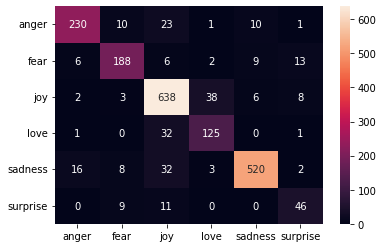

In [72]:
sns.heatmap(confusion_matrix(test_data['label'], y_pred), annot=True, fmt='d', xticklabels=label_decoding.values(), yticklabels=label_decoding.values())